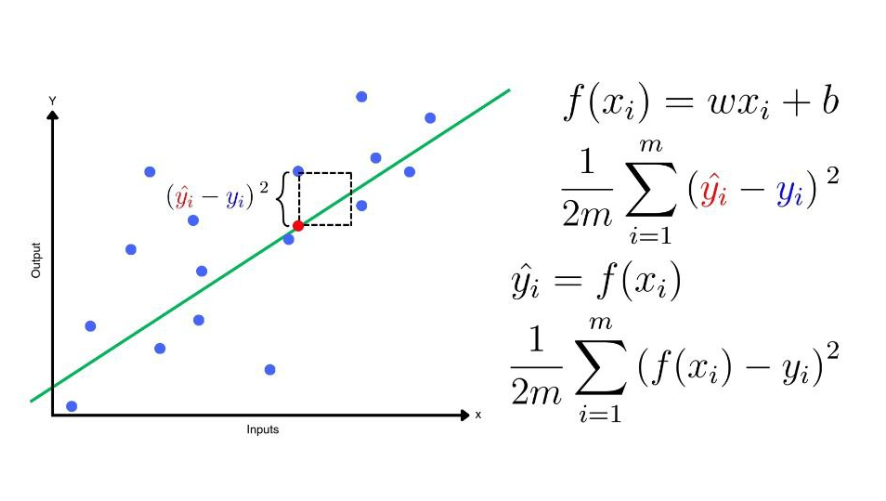

# Python Implementation of Linear Regression


### Import the necessary Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

### 2. Generating Random Dataset

In [ ]:
np.random.seed(42)  # This ensures that random numbers are always the same every time you run the code
x = np.random.rand(50,1) * 100  # np.random.rand(50,1) → generates 50 random numbers between 0 and 1, * 100 → scales them to be between 0 and 100
y = 3.5 * x + np.random.randn(50, 1) * 20   # y = 3.5x + noise , This simulates real-world data, which is never perfectly straight.

### 3. Creating and Training Linear Regression Model

In [ ]:
model = LinearRegression()  # creates an empty linear regression model
model.fit(x, y) # Training (Fitting) the Model  , the model tried to learn the best equatoin , y = mx + b

LinearRegression()

### 4. Predicting Y Values

In [ ]:
y_pred = model.predict(x)

### 5. Visulaizing the Regression Line

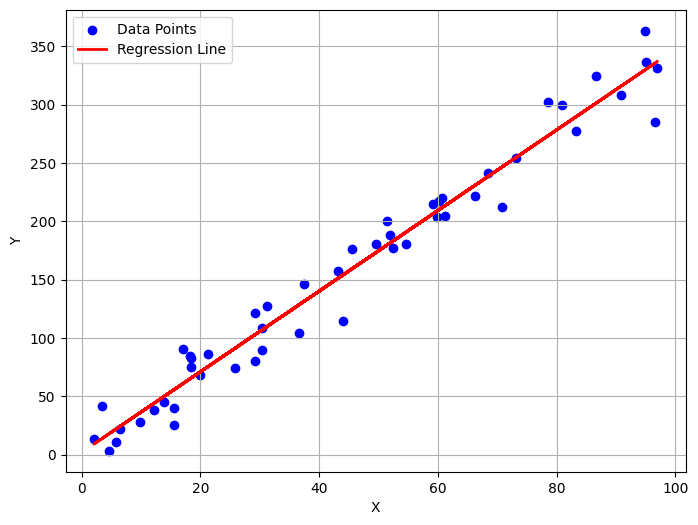

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, y_pred, color='red', linewidth=2, label="Regression Line")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

### 6. Slope and Intercept

In [ ]:
print("Slope (coefficinet): ", model.coef_[0][0])  # m
print("Intercept : ", model.intercept_[0])  # b

Slope (coefficinet):  3.4553132007706204
Intercept :  1.9337854893777546


# Python Implementation of Linear Regression - From Scratch


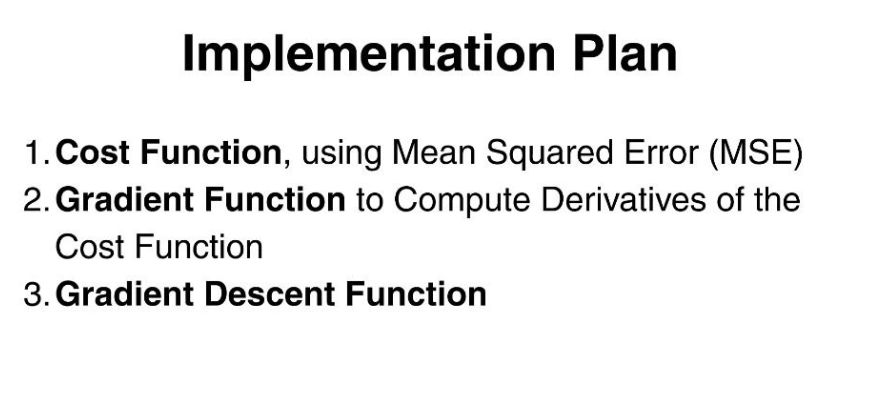

Data Link:

https://www.kaggle.com/datasets/krishnaraj30/salary-prediction-data-simple-linear-regression

In [ ]:
import kagglehub
path = kagglehub.dataset_download("krishnaraj30/salary-prediction-data-simple-linear-regression")

Using Colab cache for faster access to the 'salary-prediction-data-simple-linear-regression' dataset.


In [ ]:
import pandas as pd
import glob
import os

# 1. Find the actual CSV file in the downloaded path
# kagglehub downloads into a folder, so we look for the .csv inside it
csv_files = glob.glob(os.path.join(path, "*.csv"))

# 2. Load the first CSV found into a DataFrame
df = pd.read_csv(csv_files[0])

# 3. Show the first 5 rows
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
df.shape

(30, 2)

In [ ]:
x_train = df["YearsExperience"].values
y_train = df["Salary"].values

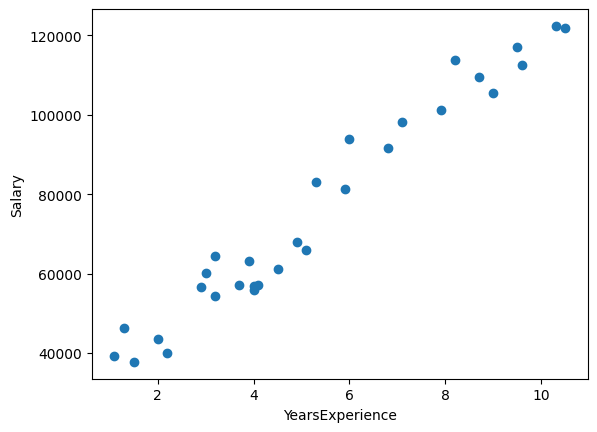

In [ ]:
plt.scatter(x_train, y_train)
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()

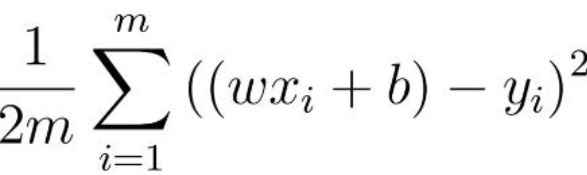

In [ ]:
# y_pred = y(hat)= f(x) = mx + b
def cost_function(x, y, w, b):
    m = len(x)  #  calculate the total number of the data input
    cost_sum = 0

    for i in range(m): # 30 point ---- 1 2 3  4 5 ------
        f = w * x[i] + b # y pred
        cost = (f - y[i]) ** 2  # cost function
        cost_sum += cost

    total_cost = (1/(2*m)) * cost_sum
    return total_cost

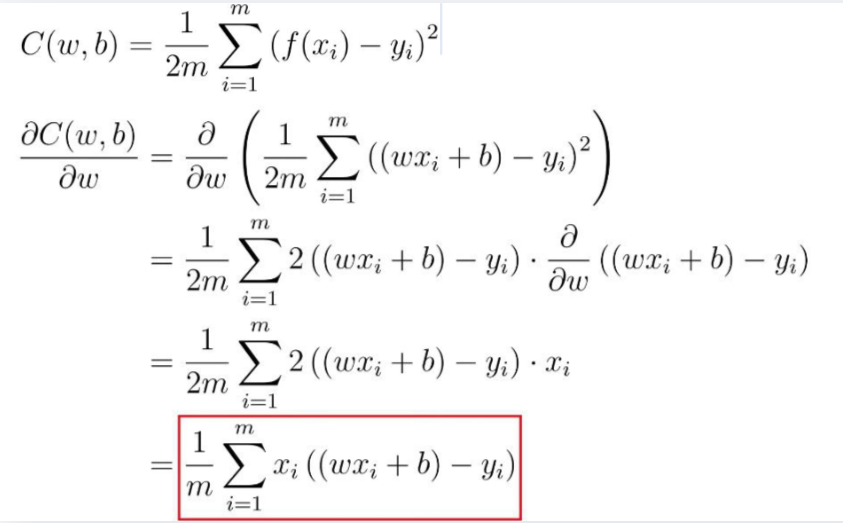

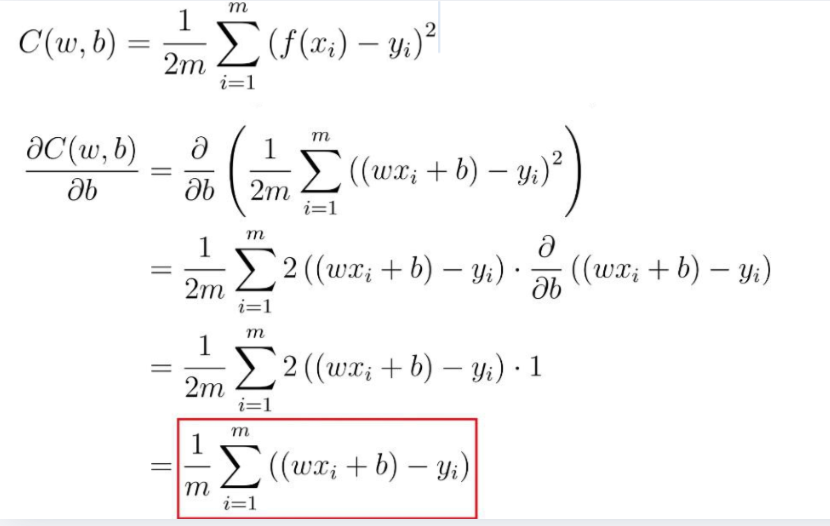

In [ ]:
def gradient_function(x, y, w, b):
    m = len(x)
    dc_dw = 0
    dc_db = 0

    for i in range(m):
        f = w * x[i] + b # yhat

        dc_dw += (f - y[i]) * x[i]
        dc_db += (f - y[i])

    dc_dw = (1/m) * dc_dw
    dc_db = (1/m) * dc_db

    return dc_dw, dc_db

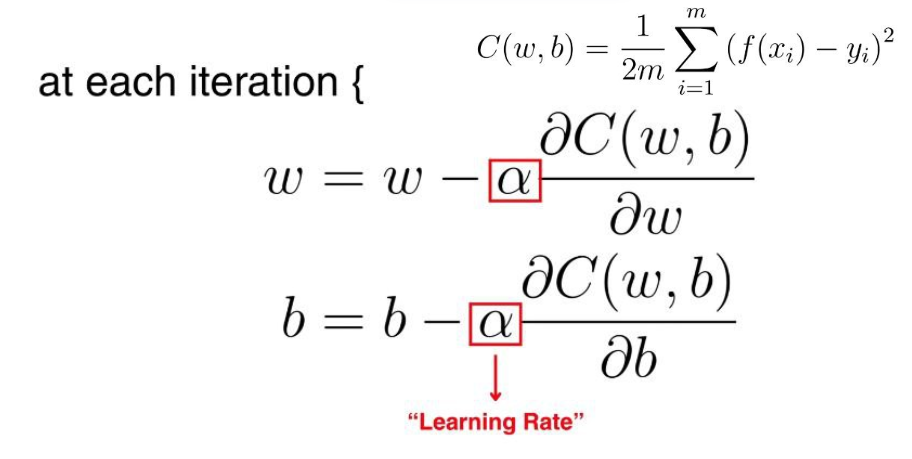

In [ ]:
def gradient_descent(x, y, alpha, iterations):
    w = 0
    b = 0

    for i in range(iterations):
        dc_dw, dc_db = gradient_function(x, y, w, b)

        w = w - alpha * dc_dw
        b = b - alpha * dc_db

        # print(f"Iteration {i}: Cost {cost_function(x, y, w, b)}")

    return w, b  #  w = slope , b = intercept

In [ ]:

learning_rate = 0.01
iterations = 10000

final_w, final_b = gradient_descent(x_train, y_train, learning_rate, iterations)

print(f"w: {final_w:.4f}, b: {final_b:.4f}")

w: 9449.9623, b: 25792.2002


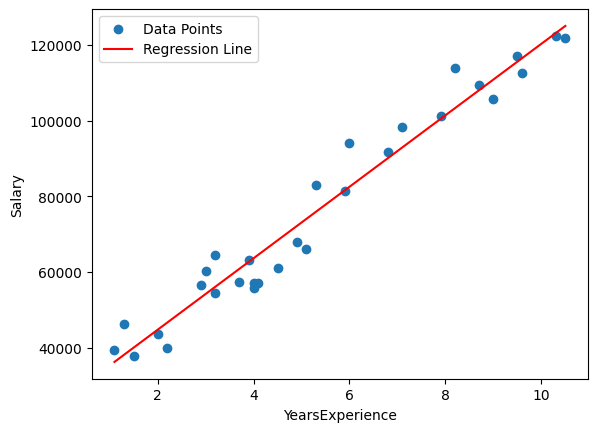

In [ ]:
plt.scatter(x_train, y_train, label='Data Points') # Plotting the original training data

# Generate smooth x values for the line
# If you used x_train directly, the line might look broken or unordered.
x_vals = np.linspace(min(x_train), max(x_train), 100) # np.linspace(start, end, 100), creates 100 evenly spaced numbers
y_vals = final_w * x_vals + final_b  # y hat = y pred = f(x)  = mx + b
plt.plot(x_vals, y_vals, color='red', label='Regression Line')

plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.legend()
plt.show()

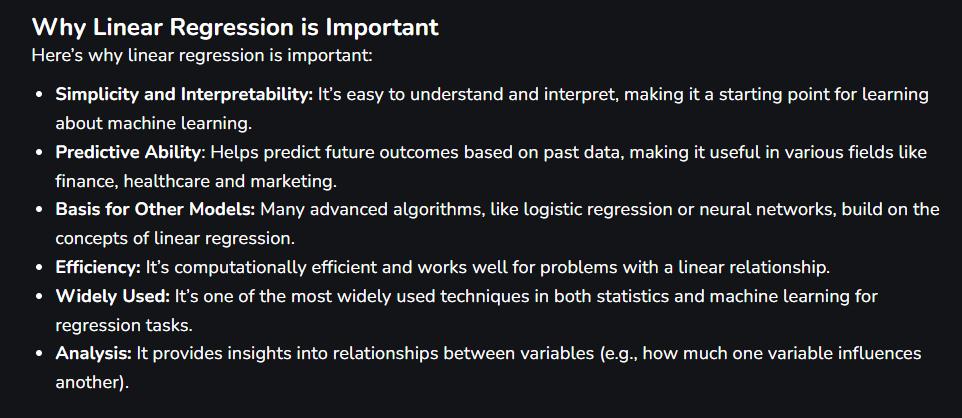

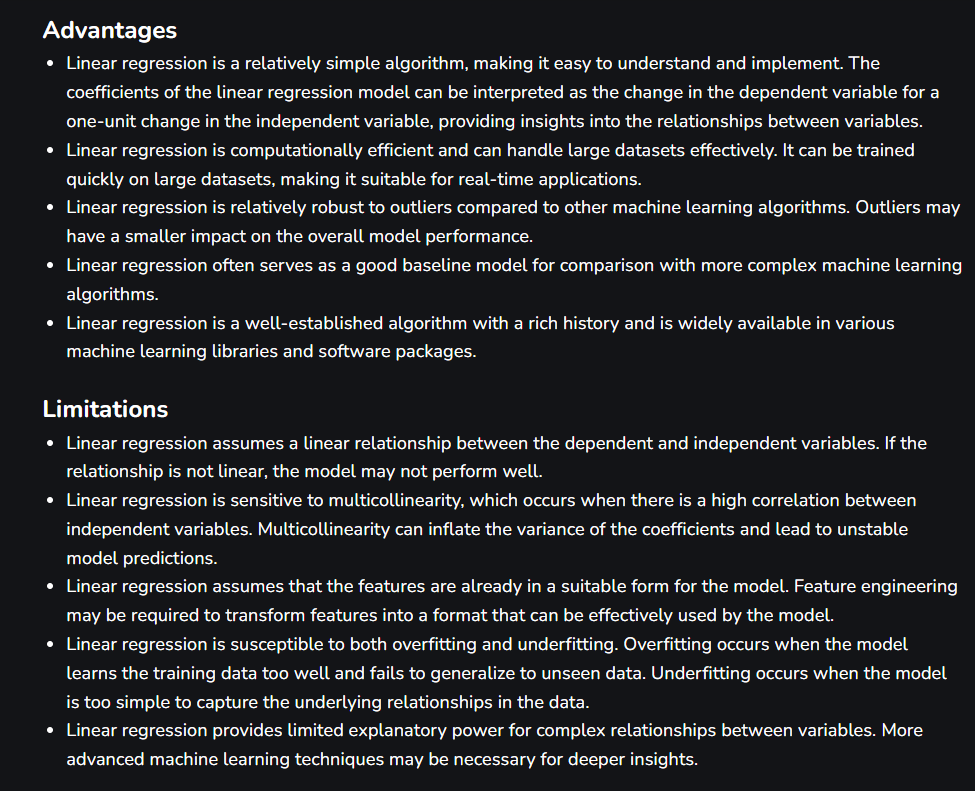

# Python implementation of Polynomial Regression - using Scikit-Learn

Polynomial Regression is a type of regression that models a curved (non-linear) relationship between input and output.

Intercept (bias): 7.105427357601002e-15
Coefficients: [ 0.00000000e+00 -8.77076189e-15  1.00000000e+00]
Mean Squared Error: 1.5146129380243426e-29


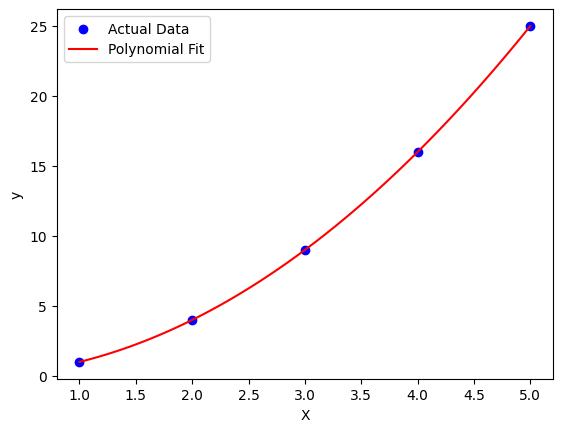

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# -----------------------------
# 1. Create sample data
# -----------------------------
# Why do we reshape X?
# Because scikit-learn requires X to be 2D
# # (5, 1)
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1) # this reshapin
y = np.array([1, 4, 9, 16, 25])  # y = x^2

# -----------------------------
# 2. Create polynomial features
# -----------------------------
degree = 2
# Creates a transformer that generates polynomial terms up to degree 2
poly = PolynomialFeatures(degree=degree) # x input = , 1, x, x2
# Transforms X into polynomial features
X_poly = poly.fit_transform(X)

# -----------------------------
# 3. Train the model
# -----------------------------
model = LinearRegression() # Creates a linear regression model
model.fit(X_poly, y) # Trains the model using:

# -----------------------------
# 4. Make predictions
# -----------------------------
y_pred = model.predict(X_poly)

# -----------------------------
# 5. Model parameters
# -----------------------------
print("Intercept (bias):", model.intercept_)
print("Coefficients:", model.coef_)

# -----------------------------
# 6. Evaluation
# -----------------------------
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:", mse)

# -----------------------------
# 7. Visualization
# -----------------------------
# Used for drawing a smooth curve
X_new = np.linspace(1, 5, 100).reshape(-1, 1)  # Creates 100 evenly spaced points between 1 and 5
X_new_poly = poly.transform(X_new) # Converts new X values into polynomial features
y_new = model.predict(X_new_poly)

plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X_new, y_new, color='red', label='Polynomial Fit')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()
